In [6]:
# import tifffile
# import matplotlib.pyplot as plt
# import glob

In [7]:
# def visualize(image, mask, pred, idx, name):
#     fig, axes = plt.subplots(1, 3, figsize=(15, 5))
#     fig.suptitle(f'Sample {idx}', fontsize=16)

#     axes[0].imshow(image, cmap='gray')
#     axes[0].set_title('Original Image')
#     axes[0].axis('off')

#     axes[1].imshow(mask, cmap='gray')
#     axes[1].set_title('Ground Truth')
#     axes[1].axis('off')

#     axes[2].imshow(pred, cmap='gray')
#     axes[2].set_title('Prediction')
#     axes[2].axis('off')

#     plt.savefig(f"./GEE_Output/Maskformer/Visualizations/{name}")
#     plt.show()

# def extract_num(name):
    
#     return name.replace("./GEE_Masks/GEE_resized/test_gee\\NDWI_Mask_", "").replace("_resized.tif", "")
    
# masks = sorted(glob.glob("./GEE_Masks/GEE_resized/test_gee/*.tif"))
# print(len(masks))

# count = 0
# for mask_path in masks:
    
#     num = extract_num(mask_path)
#     image = tifffile.imread(f"./data_new/{num}.tif")
#     image = image[0]
#     mask = tifffile.imread(mask_path)
#     pred = tifffile.imread(f"./GEE_output/Adversarial/New_20_Epoch_0_with_diff_kernels/dense_{num}.tif")
    
#     visualize(image, mask, pred, count, num)
#     count+=1



['./Maps\\Amazon Basin Map 1_page-0001.jpg', './Maps\\Amazon Basin Map 2_page-0001.jpg', './Maps\\Amazon Basin Map 3_page-0001.jpg', './Maps\\Amazon Basin Map 4_page-0001.jpg', './Maps\\Amazon Basin Map 5_page-0001.jpg', './Maps\\Amazon Basin Map 6_page-0001.jpg']


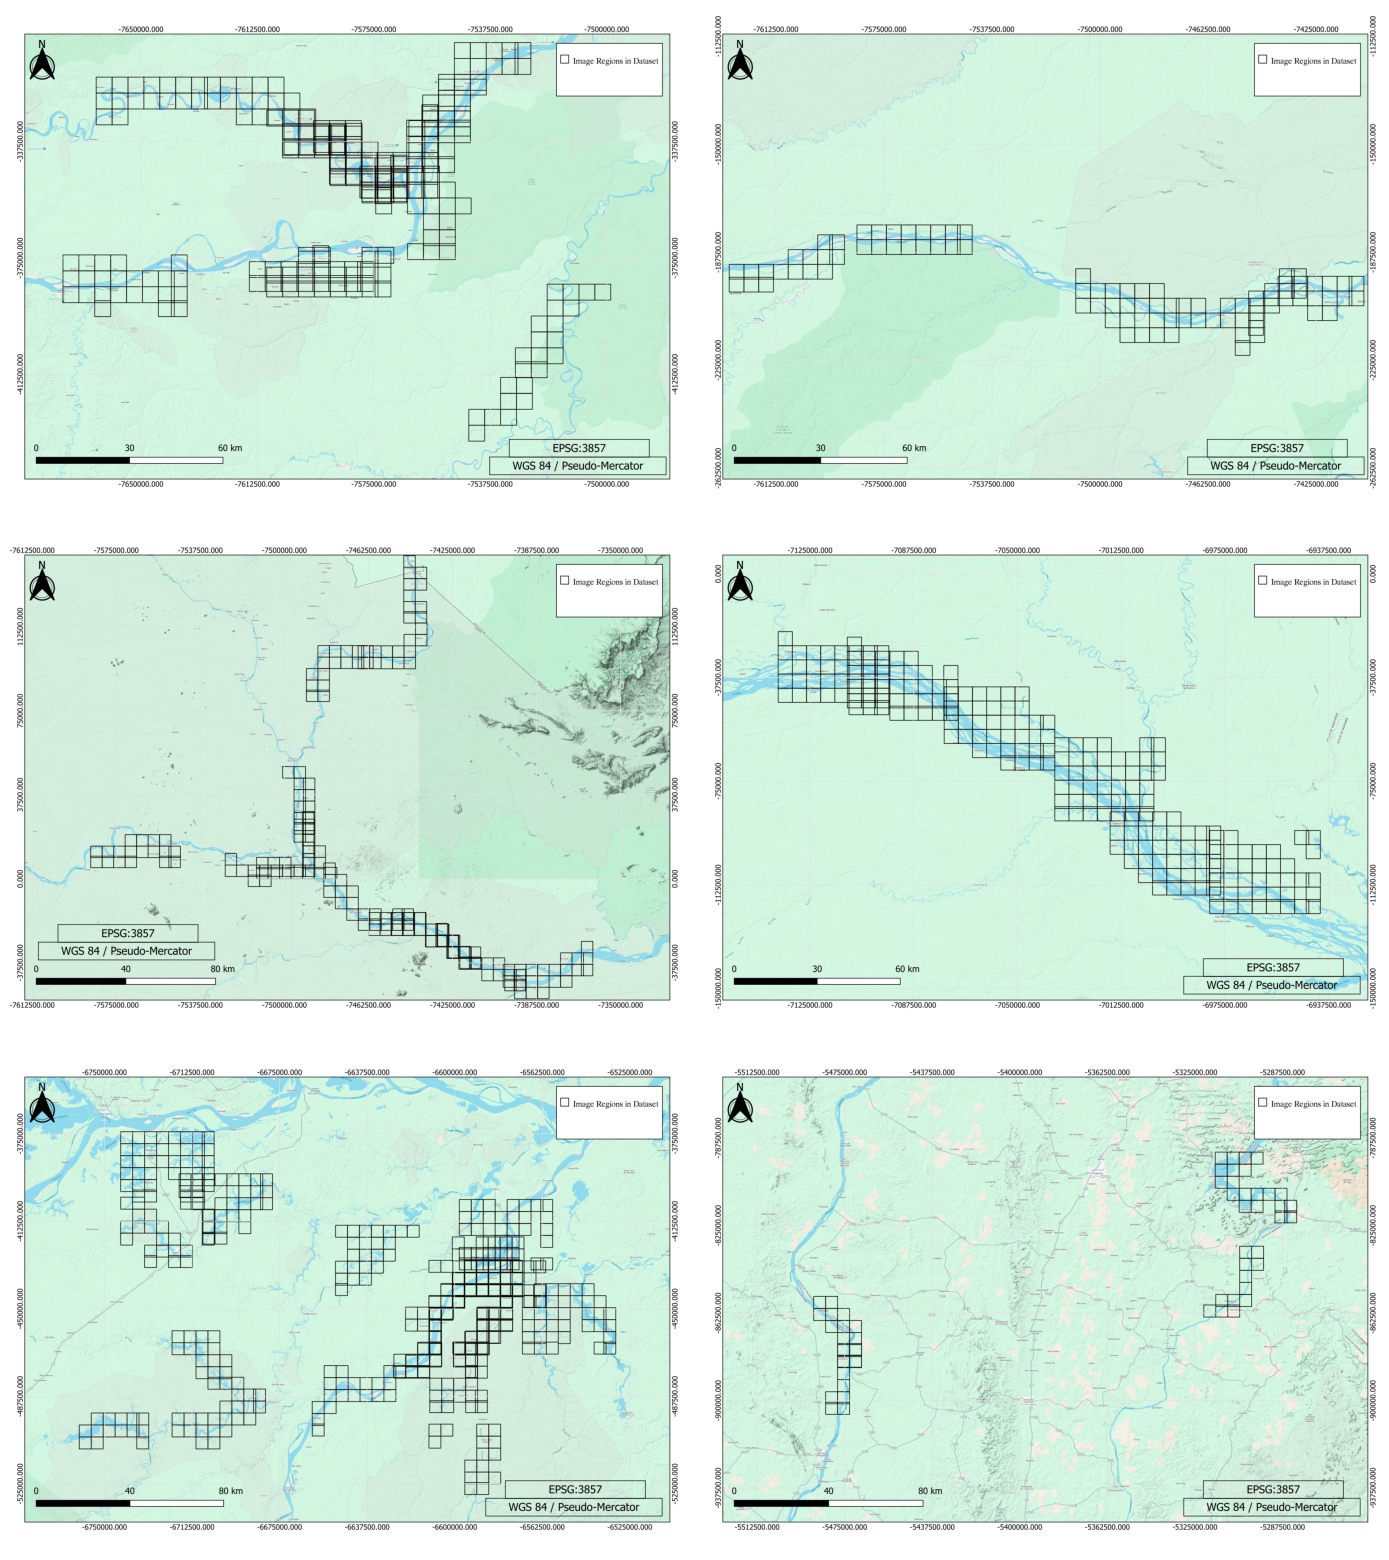

In [29]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Get all PDF files
jpg_files = glob.glob('./Maps/Amazon *.jpg')
print(jpg_files)

# Set up subplot


fig, axes = plt.subplots(3, len(jpg_files)//3, figsize=(18, 20))
axes = axes.flatten() 

i=0
for image_file in jpg_files:
    image = Image.open(image_file)
    axes[i].imshow(image)
    axes[i].axis('off')
    i+=1

plt.subplots_adjust(wspace=0, hspace=0.05)
plt.savefig(f"./Maps/Regions.jpg", bbox_inches='tight', pad_inches=0.1)
plt.show()